## LendingClub dataset from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

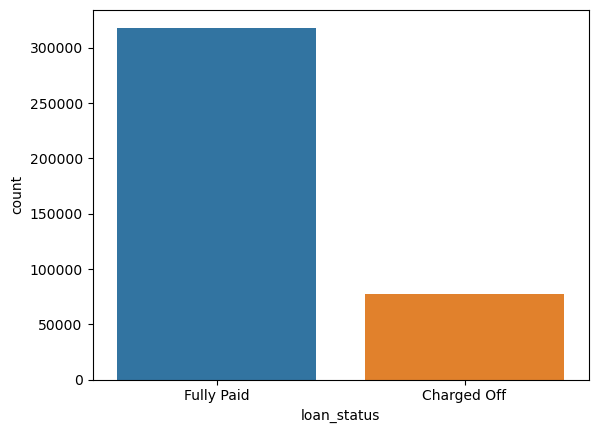

In [4]:
# Unballanced target class
sns.countplot(x='loan_status', data=df)
# approx. 25% of loans are defaulted on

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

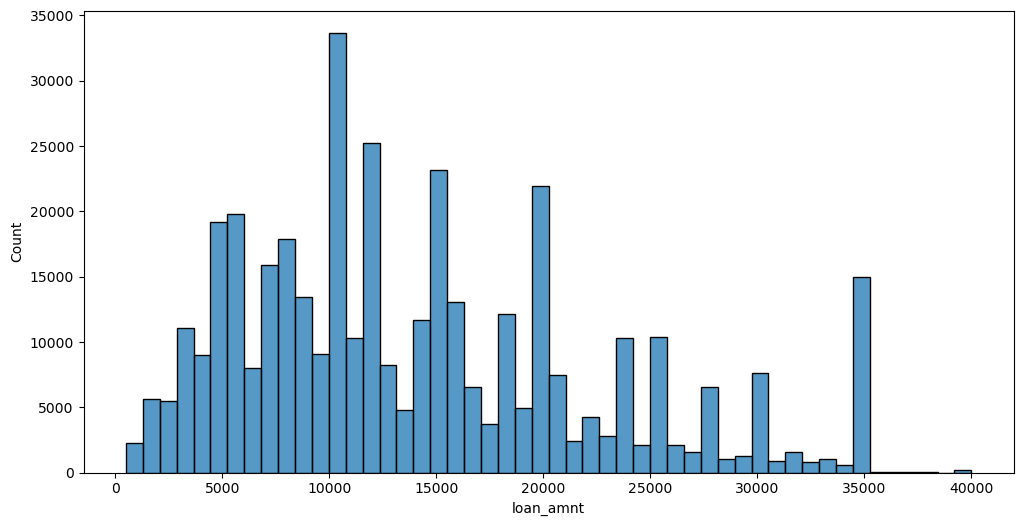

In [5]:
# Loan amounts
plt.figure(figsize=(12,6))
sns.histplot(x='loan_amnt', data=df,bins=50)

## Visualizing highly correlated features

<AxesSubplot:>

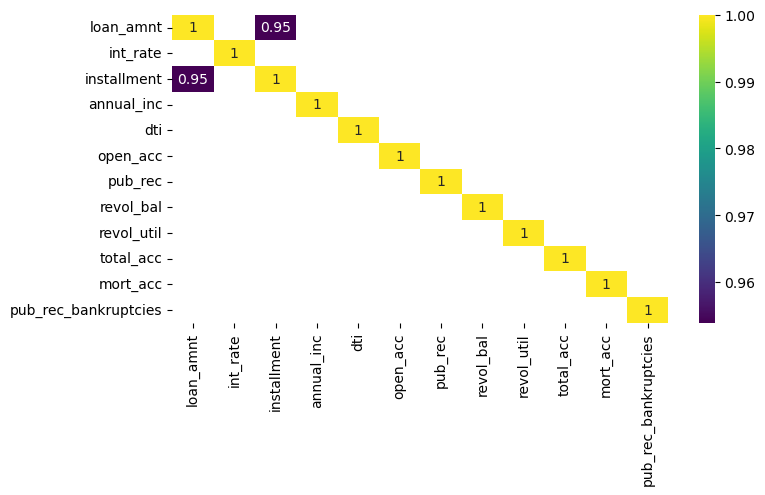

In [6]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr()[df.corr()>0.7], cmap='viridis', annot=True)
# loan amount and installment appear perfectly correlated

In [7]:
# The installment feature is extremely correlated with th loan_amount. Do we need to drop this feature?

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

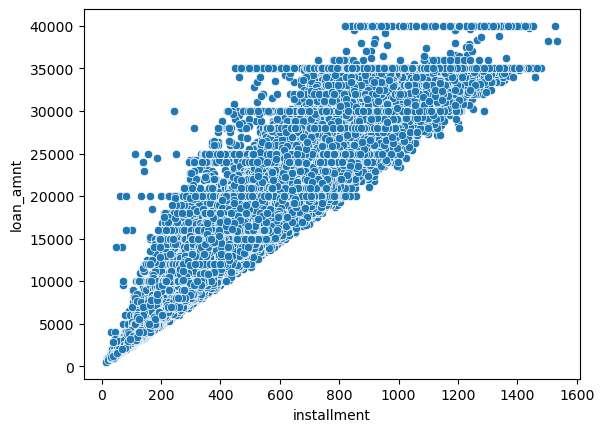

In [8]:
sns.scatterplot(data=df, x='installment',y='loan_amnt')
# Of course they are extremely correlated, the higher the loan the higher the monthly istallment.
# SO this is duplicate information and we will be dropping the installment column.

### Dropping 'installments'

In [9]:
df.drop('installment', axis=1, inplace=True)

## Let's explore the Grade and SubGrade columns 

### Unique grades and subgrades

In [10]:
print(list(np.sort(df['grade'].unique())))
print('\n')
print(list(np.sort(df['sub_grade'].unique())))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


### loan_status per grade

<AxesSubplot:xlabel='grade', ylabel='count'>

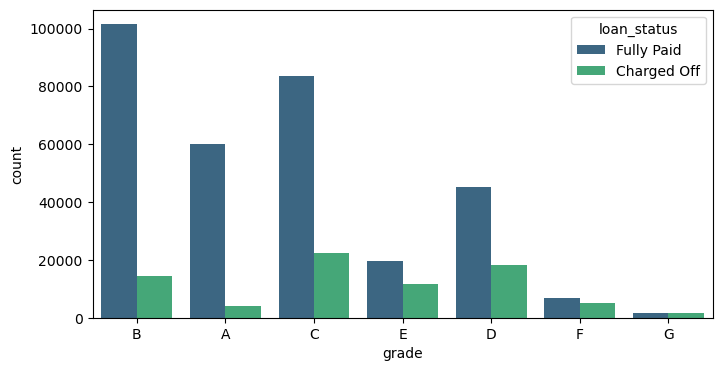

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='grade',data=df,hue='loan_status', palette='viridis')

### loan status per subgrade

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

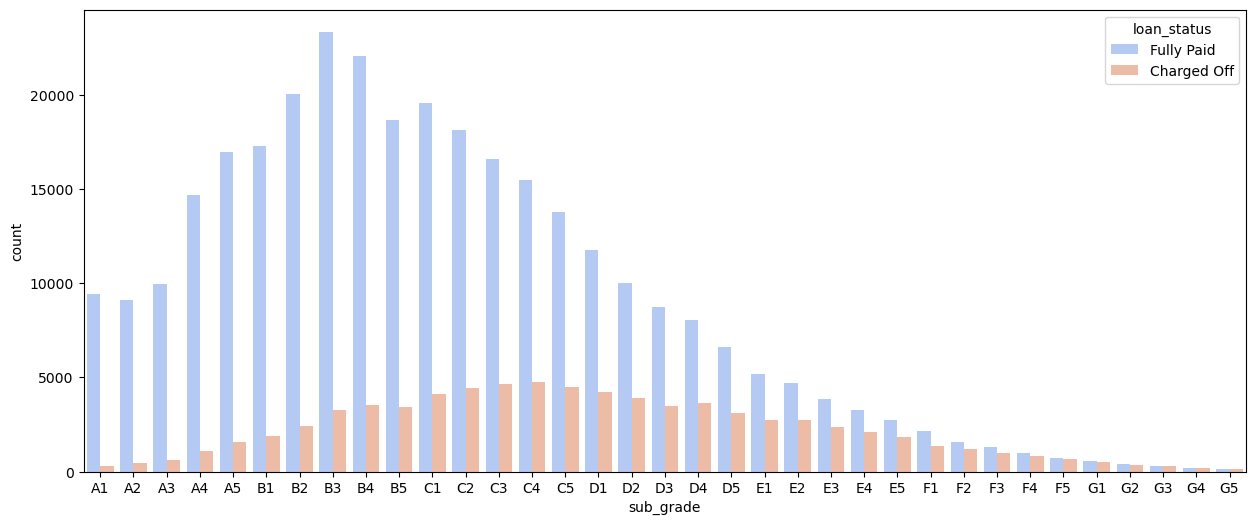

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='sub_grade',data=df,hue='loan_status' ,palette='coolwarm',order=list(np.sort(df['sub_grade'].unique())))

### %wise it looks like F and G subgrades don't get paid back that often.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

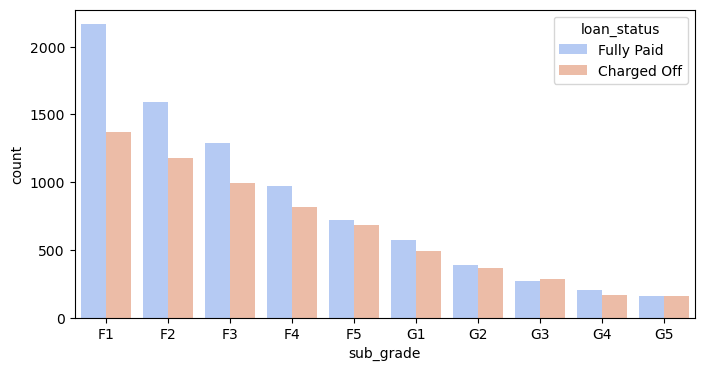

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x='sub_grade',data=df,hue='loan_status', palette='coolwarm',order=list(np.sort(df['sub_grade'].unique()))[25:])

## Good insights, now we want to create a column which will be 1 and 0 if loan status was "Fully Paid" and a 0 if it was "Charged Off".

# Data PreProcessing

### Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [14]:
df['loan_repaid'] = pd.get_dummies(df['loan_status'],drop_first=True)

In [15]:
df.drop('loan_status', axis=1, inplace=True)

### Correlation of the numeric features to the new loan_repaid column

<AxesSubplot:>

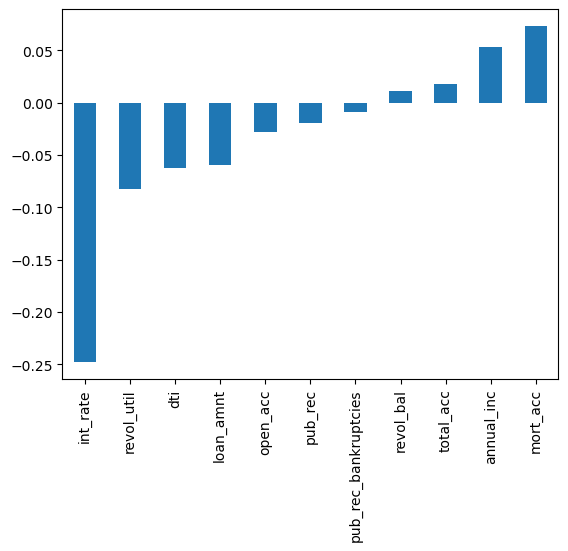

In [16]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

### Missing data

In [17]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [18]:
# emp title column
df['emp_title'].nunique()
# there are too many unique job titles to try to convert this to a dummy variable feature, so we will drop it

173105

In [19]:
# dropping emp_title
df.drop('emp_title', axis=1, inplace=True)

<AxesSubplot:>

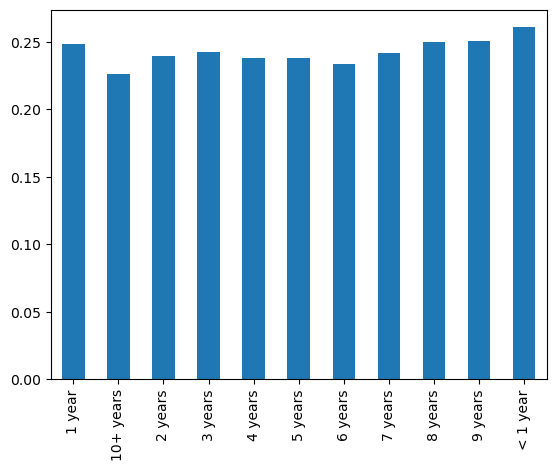

In [20]:
# emp_length column
(df[df['loan_repaid']==0]['emp_length'].value_counts() / df[df['loan_repaid']==1]['emp_length'].value_counts()).plot(kind='bar') 
# we can see that there is no correlation between emp_lenght and the loan not being repaid se we will be dropping this
# column also

In [21]:
df.drop('emp_length', axis=1, inplace=True)

In [22]:
# how many nulls do we have left?
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [23]:
# title column

In [24]:
df['title'].head(5)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [25]:
df['purpose'].head(5)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [26]:
# the title column is simply a string subcategory/description of the purpose column. we drop the title column.
df.drop('title', axis=1, inplace=True)

In [27]:
# revol_util and the pub_rec_bankruptcies have missing data points, 
# but they account for less than 0.5% of the total data.
df.dropna(subset=('revol_util','pub_rec_bankruptcies'), inplace=True)

In [28]:
#  mort_acc column has a high number of missing values so we cant drop them
# we will fill them but lets figure out how
df.corr()['mort_acc'].sort_values()[:-1]
# looks like mort_acc is most correlated with the number of total accounts, which makes sense

int_rate               -0.082656
dti                    -0.025401
revol_util              0.007514
pub_rec                 0.011576
pub_rec_bankruptcies    0.027273
loan_repaid             0.073048
open_acc                0.109440
revol_bal               0.195063
loan_amnt               0.222381
annual_inc              0.236277
total_acc               0.381205
Name: mort_acc, dtype: float64

In [29]:
# Let's try this fillna() approach. We will group the dataframe by 
# the total_acc and calculate the mean value for the mort_acc per total_acc entry.
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052326
4.0      0.066743
5.0      0.102108
6.0      0.151123
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [30]:
# We wil fill in the missing mort_acc values based on their total_acc value. 
# If the mort_acc is missing, then we will fill in that missing value with 
# the mean value corresponding to its total_acc value from the series we created above.
def mort_acc_clean(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [31]:
df['mort_acc'] = df.apply(lambda x: mort_acc_clean(x['total_acc'],x['mort_acc']),axis=1)

In [32]:
df['mort_acc'].isnull().sum()

0

## Categorical Variables and Dummy Variables

In [33]:
# categorical columns
list(df.select_dtypes(['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### Let's now go through all the string features to see what we should do with them.

### term column

In [34]:
df['term'].head(5)
# makes sense to convert the term feature into either a 36 or 60 and make it an integer 

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [35]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

### grade column

In [36]:
# We already know grade is part of sub_grade, so we just drop the grade feature 
# and convert the subgrade into dummy variables.
df.drop('grade',axis=1, inplace=True)

In [37]:
df1 = pd.get_dummies(df['sub_grade'],drop_first=True)

df = df.drop('sub_grade',axis=1)

df = pd.concat([df,df1],axis=1)

In [38]:
# cat columns left
list(df.select_dtypes(include='object'))

['home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### we convert verification_status, application_type, initial_list_status, purpose into dummies

In [39]:
cols = ['verification_status', 'application_type','initial_list_status','purpose']

In [40]:
df2 = pd.get_dummies(data=df, columns= cols, drop_first=True)

In [41]:
df.drop(df[cols], axis=1, inplace=True)

### home ownership

In [42]:
# can we turn it into a dummy?
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [43]:
# yes we can but before that we are going to replace none and any with other
df['home_ownership'].loc[(df['home_ownership']=='ANY') | (df['home_ownership']=='NONE')] = 'OTHER'

C:\Users\aster\AppData\Local\Temp\ipykernel_15228\687631430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_ownership'].loc[(df['home_ownership']=='ANY') | (df['home_ownership']=='NONE')] = 'OTHER'


In [44]:
df = pd.get_dummies(data=df, columns=['home_ownership'],drop_first=True)

### address column

In [45]:
# we can feature engineer a zip code column from the address in the data set
df['zip_code'] = df['address'].apply(lambda x : x.split()[-1])
df.drop('address',axis=1,inplace=True)

In [46]:
# and then dummidy it
df = pd.get_dummies(data=df, columns=['zip_code'],drop_first=True)

### issue_d column (issue_date)

In [47]:
# This would be data leakage, we wouldn't know beforehand whether or 
# not a loan would be issued when using our model, so in theory we 
# wouldn't have an issue_date, so we drop this feature.
df.drop('issue_d',axis=1, inplace=True)

### earliest_cr_line

In [48]:
#  This appears to be a historical time stamp feature so we will extract the year
#  and then convert it to a numeric feature.
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[-1])
df.drop('earliest_cr_line',axis=1,inplace=True)

# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [51]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Normalizing the Data

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [55]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)


In [56]:
model = Sequential()

model.add(BatchNormalization())
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Dense(56,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy' ,metrics=['accuracy'])

In [57]:
model.fit(x=X_train,y=y_train,epochs=25, validation_data=(X_test,y_test),batch_size=256, callbacks=[early])

Epoch 1/25
1236/1236 [==============================] - 10s 6ms/step - loss: 0.3028 - accuracy: 0.8779 - val_loss: 0.2654 - val_accuracy: 0.8870
Epoch 2/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2656 - accuracy: 0.8879 - val_loss: 0.2624 - val_accuracy: 0.8871
Epoch 3/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2626 - accuracy: 0.8881 - val_loss: 0.2618 - val_accuracy: 0.8869
Epoch 4/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2609 - accuracy: 0.8882 - val_loss: 0.2614 - val_accuracy: 0.8868
Epoch 5/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2602 - accuracy: 0.8884 - val_loss: 0.2607 - val_accuracy: 0.8868
Epoch 6/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2597 - accuracy: 0.8884 - val_loss: 0.2602 - val_accuracy: 0.8872
Epoch 7/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2594 - accuracy: 0.8885 - val_loss: 0.2599 - val_accuracy

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

2471/2471 [==============================] - 5s 2ms/step


In [60]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6775  8883]
 [   52 63334]]


## Given the customer below, would we offer this person a loan?

In [61]:
import random
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt               25000.0
term                         60
int_rate                  18.24
annual_inc              61665.0
dti                       30.11
open_acc                   16.0
pub_rec                     0.0
revol_bal               27778.0
revol_util                 65.5
total_acc                  46.0
mort_acc                    0.0
pub_rec_bankruptcies        0.0
A2                            0
A3                            0
A4                            0
A5                            0
B1                            0
B2                            0
B3                            0
B4                            0
B5                            0
C1                            0
C2                            0
C3                            0
C4                            0
C5                            0
D1                            0
D2                            0
D3                            0
D4                            0
D5                            1
E1      

In [62]:
new_customer = scaler.transform(new_customer.values.reshape(-1,59))

In [67]:
y_pred = np.round(model.predict(new_customer))

1/1 [==============================] - 0s 29ms/step


In [68]:
y_pred

array([[1.]], dtype=float32)

### did this person actually end up paying back their loan?

In [69]:
df['loan_repaid'].iloc[305323]

1

### Yes he did